# Project: European Plane Traffic

## 1. Introduction:

This project aims to have a look at European plane traffic between the years of 2016 and 2022. The questions asked are -

1. Which country has the most traffic over the years?
2. Which country is the best connected?
3. Which country is the least well connected?
4. Which airports are the main hubs of Europe?

## 2. Description of the dataset:

The dataset used in the project - https://www.kaggle.com/datasets/umerhaddii/european-flights-dataset. This dataset contains flight information of European airports between 2016 and 2022.

## 3. Methods

The methods used are further defined below.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

flights_data = pd.read_csv('/content/flights.csv')
flights_data.head()

,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_DEP_1,FLT_ARR_1,FLT_TOT_1,FLT_DEP_IFR_2,FLT_ARR_IFR_2,FLT_TOT_IFR_2,Pivot Label
0,2016,1,JAN,2016-01-01T00:00:00Z,EBAW,Antwerp,Belgium,4,3,7,NaN,NaN,NaN,Antwerp (EBAW)
1,2016,1,JAN,2016-01-01T00:00:00Z,EBBR,Brussels,Belgium,174,171,345,174.0,161.0,335.0,Brussels (EBBR)
2,2016,1,JAN,2016-01-01T00:00:00Z,EBCI,Charleroi,Belgium,45,47,92,45.0,45.0,90.0,Charleroi (EBCI)
3,2016,1,JAN,2016-01-01T00:00:00Z,EBLG,Liège,Belgium,6,7,13,NaN,NaN,NaN,Liège (EBLG)
4,2016,1,JAN,2016-01-01T00:00:00Z,EBOS,Ostend-Bruges,Belgium,7,7,14,NaN,NaN,NaN,Ostend-Bruges (EBOS)


In [14]:
flights_data.describe()

,YEAR,MONTH_NUM,FLT_DEP_1,FLT_ARR_1,FLT_TOT_1,FLT_DEP_IFR_2,FLT_ARR_IFR_2,FLT_TOT_IFR_2
count,688099.000000,688099.000000,688099.000000,688099.000000,688099.000000,208314.000000,208314.000000,208314.000000
mean,2018.823684,6.301461,63.238884,63.278576,126.517460,143.703097,143.610530,287.313628
std,1.841191,3.460197,110.738988,110.707515,221.415893,153.594306,153.359483,306.855582
min,2016.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,3.000000,5.000000,5.000000,10.000000,38.000000,38.000000,76.000000
50%,2019.000000,6.000000,17.000000,17.000000,35.000000,91.000000,91.000000,182.000000
75%,2020.000000,9.000000,71.000000,71.000000,141.000000,195.000000,195.000000,390.000000
max,2022.000000,12.000000,847.000000,813.000000,1628.000000,1039.000000,817.000000,1624.000000


In [15]:
flights_data[['FLT_DEP_IFR_2', 'FLT_ARR_IFR_2', 'FLT_TOT_IFR_2']] = flights_data[['FLT_DEP_IFR_2', 'FLT_ARR_IFR_2', 'FLT_TOT_IFR_2']].fillna(0)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

### Top 10 hubs of Europe

Here we can clearly see that Amsterdam Schipol serves the most passengers, followed by Paris CDG, Frankfurt and London Heathrow. It also clearly shows that most flights originate and terminate in the Western European region.

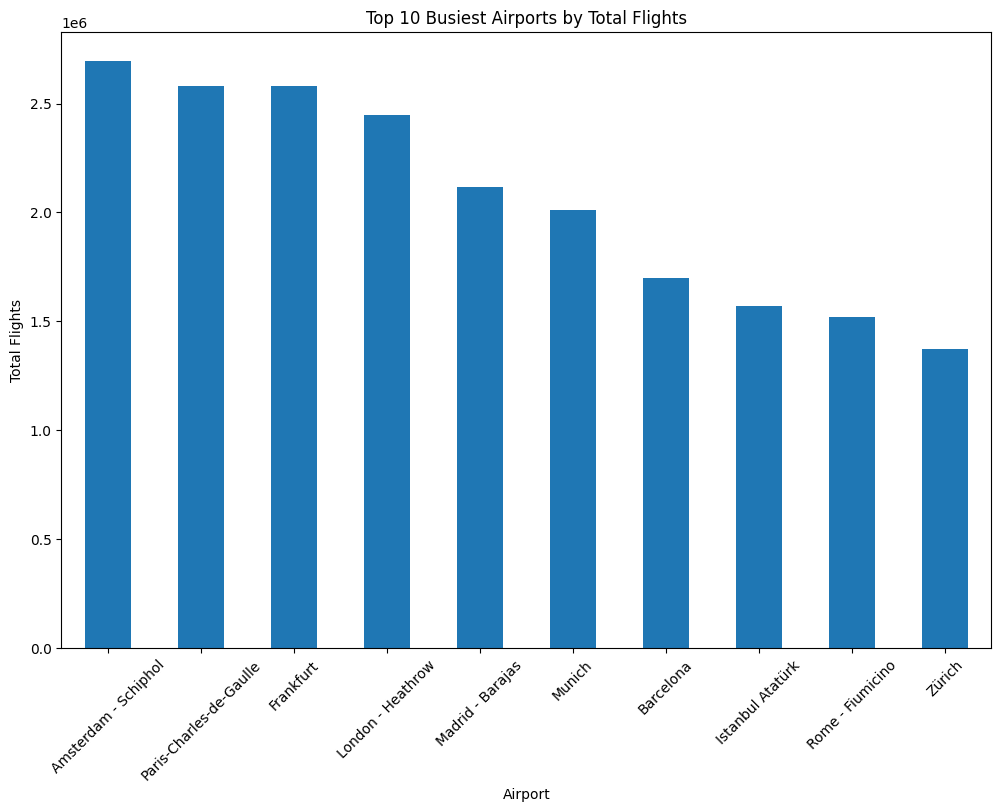

In [17]:
top_airports = flights_data.groupby('APT_NAME')['FLT_TOT_1'].sum().nlargest(10)
plt.figure(figsize=(12, 8))
top_airports.plot(kind='bar')
plt.title('Top 10 Busiest Airports by Total Flights')
plt.xlabel('Airport')
plt.ylabel('Total Flights')
plt.xticks(rotation=45)
plt.show()

### Best Connected Country

Here we can clearly see that France has the most flights of all European airports. On the other hand North Macedonia is the least well connected.

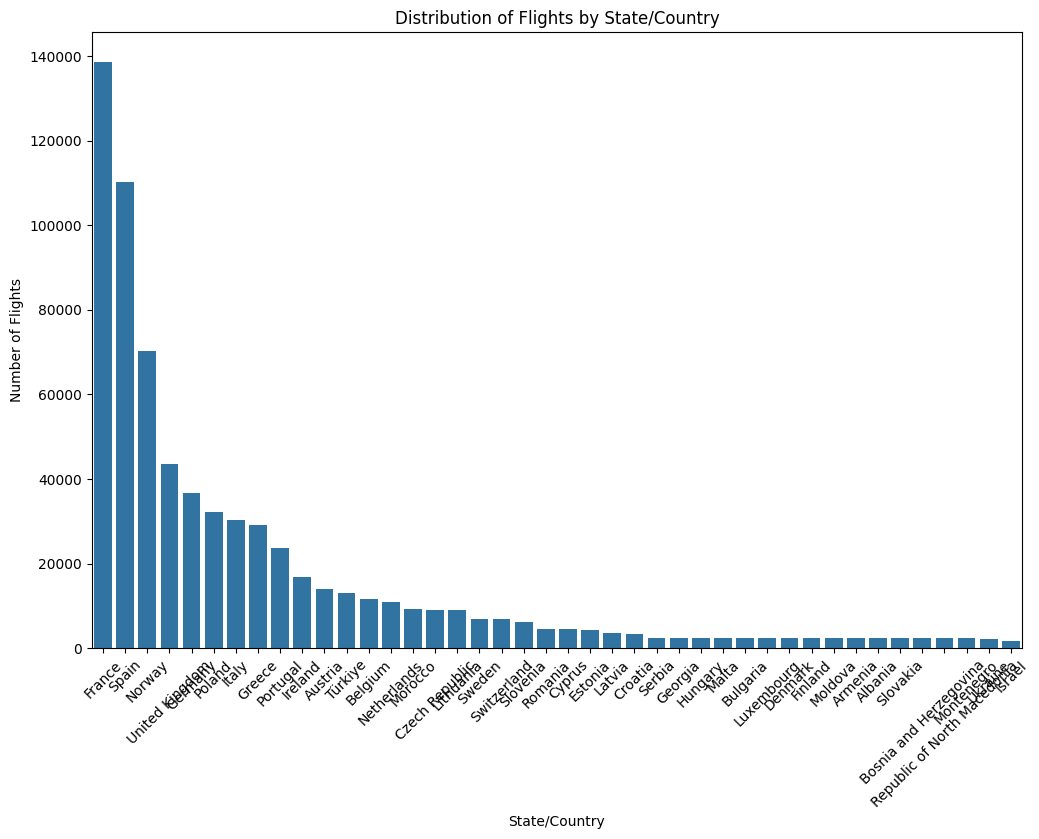

In [18]:
# Distribution of flights by state or country
plt.figure(figsize=(12, 8))
sns.countplot(x='STATE_NAME', data=flights_data, order=flights_data['STATE_NAME'].value_counts().index)
plt.title('Distribution of Flights by State/Country')
plt.xlabel('State/Country')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()

In [19]:
# Average daily departures, arrivals, and total flights
average_departures = flights_data['FLT_DEP_1'].mean()
average_arrivals = flights_data['FLT_ARR_1'].mean()
average_total_flights = flights_data['FLT_TOT_1'].mean()

In [20]:
print(f"Average daily departures: {average_departures:.2f}")
print(f"Average daily arrivals: {average_arrivals:.2f}")
print(f"Average daily total flights: {average_total_flights:.2f}")

Average daily departures: 63.24
Average daily arrivals: 63.28
Average daily total flights: 126.52
